In [28]:
import numpy as np

# plotting 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import PyPDF2

# data manager and analysis
import vodex as vx
import numan as nu

# writing files
import tifffile as tif

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


run this cell to get some handy functions:

In [32]:
def get_significant(p, p_control):
    
    significant_cells_stim = np.array(p)<0.05
    n_significant = np.sum(significant_cells_stim)
    print(f'significant stim only :{n_significant}')

    significant_cells_control = np.array(p_control)<0.05
    n_significant_control = np.sum(significant_cells_control)
    print(f'significant control only :{n_significant_control}')

    significant_cells = np.logical_and(significant_cells_stim,~significant_cells_control)
    n_significant = np.sum(significant_cells)
    print(f'significant stim but not control :{n_significant}')
    
    return significant_cells

def p_value_histogram(p,p_control):
    
    bins = np.arange(0,1.2,0.05)
    plt.hist(p, bins, alpha=0.5, label='stimulus')
    plt.hist(p_control, bins, alpha=0.5, label='control')
    plt.legend(loc='upper right')
    
def merge_pdfs(pdfs, filename):
    mergeFile = PyPDF2.PdfFileMerger()
    for pdf in pdfs:
        mergeFile.append(PyPDF2.PdfFileReader(pdf, 'rb'))
        os.remove(pdf)
    mergeFile.write(filename)

# Define experiment: 

In [2]:
blank = vx.Condition(vx.Stimulus('blank','blank'), name = 'Blank')
dot2 = vx.Condition(vx.Stimulus('2dot','2dot'), name = 'dot 2')
dot5 = vx.Condition(vx.Stimulus('5dot','5dot'), name = 'dot 5')

spec = {}
spec['conditions'] = [blank,dot2,
              blank,dot5]
spec['timing'] = np.array([6,1,
                   6,1])*52 # in frames
spec['project_dir'] = 'D:/Code/repos/numerosity_2/data/raw/img/20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1/'
spec['frames_per_volume'] = 52

experiment = vx.Experiment.from_dic(spec)
experiment.summary()

Total of 5 files.
Check the order :
[ 0 ] 20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1_MMStack_Pos0.ome.tif : 8910 frames
[ 1 ] 20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1_MMStack_Pos0_1.ome.tif : 8909 frames
[ 2 ] 20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1_MMStack_Pos0_2.ome.tif : 8909 frames
[ 3 ] 20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1_MMStack_Pos0_3.ome.tif : 8909 frames
[ 4 ] 20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1_MMStack_Pos0_4.ome.tif : 763 frames

Cycle length: 728
Condition ['blank']: for 312 frames
Condition ['2dot']: for 52 frames
Condition ['blank']: for 312 frames
Condition ['5dot']: for 52 frames

Total cycles (ceil): 50
Total frames : 36400
Total good volumes : 700
Frames per volume : 52



## get the volume ids for the conditions that you will be comparing : 

In [3]:
dot2_idx = experiment.select_volumes(dot2)
dot5_idx = experiment.select_volumes(dot5)
blank_idx = experiment.select_volumes(blank).reshape((100,6))[:,-1]

print(dot2_idx.shape, dot2_idx)
print(dot5_idx.shape, dot5_idx)
print(blank_idx.shape, blank_idx)

(50,) [  6  20  34  48  62  76  90 104 118 132 146 160 174 188 202 216 230 244
 258 272 286 300 314 328 342 356 370 384 398 412 426 440 454 468 482 496
 510 524 538 552 566 580 594 608 622 636 650 664 678 692]
(50,) [ 13  27  41  55  69  83  97 111 125 139 153 167 181 195 209 223 237 251
 265 279 293 307 321 335 349 363 377 391 405 419 433 447 461 475 489 503
 517 531 545 559 573 587 601 615 629 643 657 671 685 699]
(100,) [  5  12  19  26  33  40  47  54  61  68  75  82  89  96 103 110 117 124
 131 138 145 152 159 166 173 180 187 194 201 208 215 222 229 236 243 250
 257 264 271 278 285 292 299 306 313 320 327 334 341 348 355 362 369 376
 383 390 397 404 411 418 425 432 439 446 453 460 467 474 481 488 495 502
 509 516 523 530 537 544 551 558 565 572 579 586 593 600 607 614 621 628
 635 642 649 656 663 670 677 684 691 698]


## Load spots from the Position and Diameter csv files produced by Imaris

In [5]:
imaris_csv_folder = 'D:/Code/repos/numerosity_2/data/raw/csv/20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1/imaris/'
points_file = f'{imaris_csv_folder}dot2_vs_dot5_t_score_Position.csv'
diameter_file = f'{imaris_csv_folder}dot2_vs_dot5_t_score_Diameter.csv'

resolution = [4.8, 1.17, 1.17]
spots = nu.Spots.from_imaris(points_file,diameter_file,resolution = resolution, units='phs')

Get the raw signal for each spot : 

In [6]:
spots.get_signals(volumes="all", experiment=experiment, batch_size=100, traces_type="raw")

Batch [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99], t_start 0, t_end 100


100%|█████████████████████████████████████████████████████████████████████████████| 5200/5200 [00:14<00:00, 354.22it/s]


Batch [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199], t_start 100, t_end 200


100%|█████████████████████████████████████████████████████████████████████████████| 5200/5200 [00:14<00:00, 348.97it/s]


Batch [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299], t_start 200, t_end 300


100%|█████████████████████████████████████████████████████████████████████████████| 5200/5200 [00:14<00:00, 351.92it/s]


Batch [300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371
 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389
 390 391 392 393 394 395 396 397 398 399], t_start 300, t_end 400


100%|█████████████████████████████████████████████████████████████████████████████| 5200/5200 [00:14<00:00, 352.02it/s]


Batch [400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499], t_start 400, t_end 500


100%|█████████████████████████████████████████████████████████████████████████████| 5200/5200 [00:14<00:00, 352.94it/s]


Batch [500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599], t_start 500, t_end 600


100%|█████████████████████████████████████████████████████████████████████████████| 5200/5200 [00:14<00:00, 348.80it/s]


Batch [600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617
 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635
 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653
 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671
 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689
 690 691 692 693 694 695 696 697 698 699], t_start 600, t_end 700


100%|█████████████████████████████████████████████████████████████████████████████| 5200/5200 [00:14<00:00, 352.55it/s]


## Find significant cells 

 Data points in group 1 : 50,in group 1 : 50.
Number of spots : 97.


100%|██████████████████████████████████████████████████████████████████████████████████| 97/97 [00:48<00:00,  2.00it/s]


 Data points in group 1 : 50,in group 1 : 50.
Number of spots : 97.


100%|██████████████████████████████████████████████████████████████████████████████████| 97/97 [00:48<00:00,  2.00it/s]


significant stim only :58
significant control only :10
significant stim but not control :52


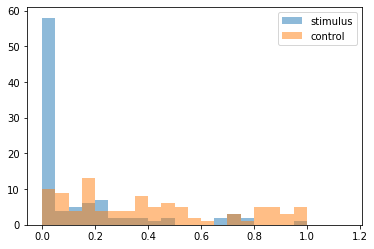

In [7]:
np.random.seed(42)

# get dff for each cell
sliding_window = 15 # in volumes
signals_dff = spots.signals.as_dff(sliding_window)

# calculate p-values using bootstrap
sa = nu.SignalAnalyzer(signals_dff)
print( "Getting p-values for stim")
p = sa.get_p_list_of_difference_of_means(dot2_idx, dot5_idx)
print( "Getting p-values for blank before stim")
p_control = sa.get_p_list_of_difference_of_means(dot2_idx-1, dot5_idx-1)

# show histogram, determine significance 
print( "Summary : ")
p_value_histogram(p,p_control)
significant = get_significant(p, p_control)

# add the p-values and significance info to the spots
spots.add_groups({"p_stim":p, "p_control":p_control, "significant":significant})

# Save Significant Cells as Json 

In [ ]:
spots.to_json(f"D:/Code/repos/numerosity_2/data/processed/img/20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1/spots/dot2_vs_dot5_cells.json")

# Save Significant Cells as tif 

In [13]:
significant_mask = spots.get_group_mask(spots.groups["significant"], (52, 468, 500))
tif.imwrite("D:/Code/repos/numerosity_2/data/processed/img/20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1/spots/significant_cells_mask.tif",
                   significant_mask.astype(np.uint16),shape=(52,468,500),metadata={'axes': 'ZYX'}, imagej=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:05<00:00, 10.28it/s]


# Plot significant signals

Here is an example for how to look at raw signals : 

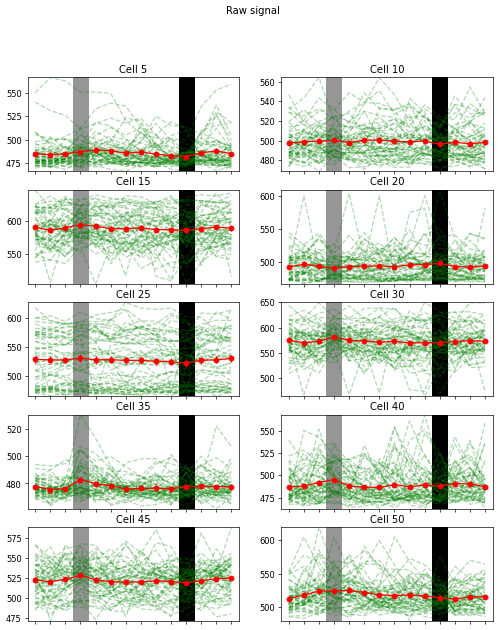

In [18]:
significant_signals = spots.get_group_signals(spots.groups['significant'])

main_title = "Raw signal"
# what points to show ( For example, show 10 cells: 5,10,15,20,25,30,35,40,45,50 ... ) 
point_idx = [5,10,15,20,25,30,35,40,45,50]
titles = [f"Cell {ipt}" for ipt in point_idx]

spr = nu.SignalPlotter(significant_signals, experiment)
spr.show_psh(point_idx, 
            main_title, 
            titles, 
            # front_to_tail will shift the cycleby the set number of voxels
            # so when set to 3, there are 3 blank volumes at the begining and at the end ... 
            # if set to 0, will have 6 leading blanks and will end right after the 5 dots (black bar)
            front_to_tail = 3, 
            # what grid to use to show the points
            figure_layout = [5,2] ,
            # what error type to use ( "sem" for SEM or "prc" for 5th - 95th percentile )
            error_type = "sem",
            # figure parameters
            figsize = (10, 12),
            dpi = 60,
            # wheather to plot the individual traces 
            plot_individual = True,
            # the color of the individual traces (if shown)
            noise_color = '--g')

and here if the dff : 

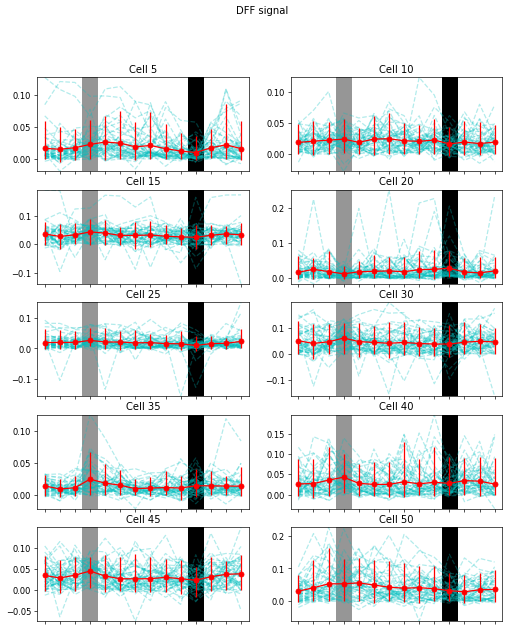

In [16]:
significant_signals_dff = significant_signals.as_dff(sliding_window)

main_title = "DFF signal"
# what points to show ( np.arange(10) will show the first 10 points ... ) 
point_idx = [5,10,15,20,25,30,35,40,45,50]
titles = [f"Cell {ipt}" for ipt in point_idx]

sp = nu.SignalPlotter(significant_signals_dff, experiment)
sp.show_psh(point_idx, 
            main_title, 
            titles, 
            # front_to_tail will shift the cycleby the set number of voxels
            # so when set to 3, there are 3 blank volumes at the begining and at the end ... 
            # if set to 0, will have 6 leading blanks and will end right after the 5 dots (black bar)
            front_to_tail = 3, 
            # what grid to use to show the points
            figure_layout = [5,2] ,
            # what error type to use ( "sem" for SEM or "prc" for 5th - 95th percentile )
            error_type = "prc",
            # figure parameters
            figsize = (10, 12),
            dpi = 60,
            # wheather to plot the individual traces 
            plot_individual = True,
            # the color of the individual traces (if shown)
            noise_color = '--c')

## Create a pdf with all the traces : 

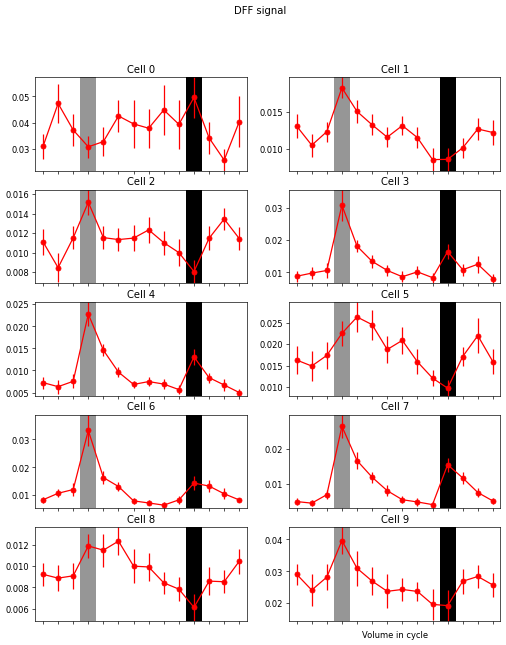

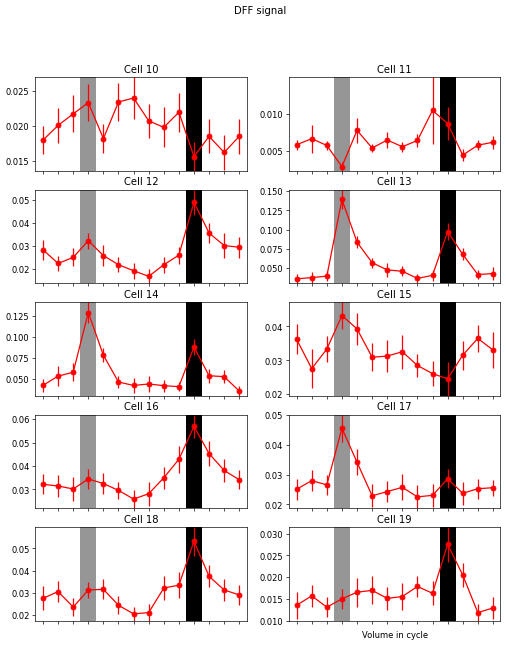

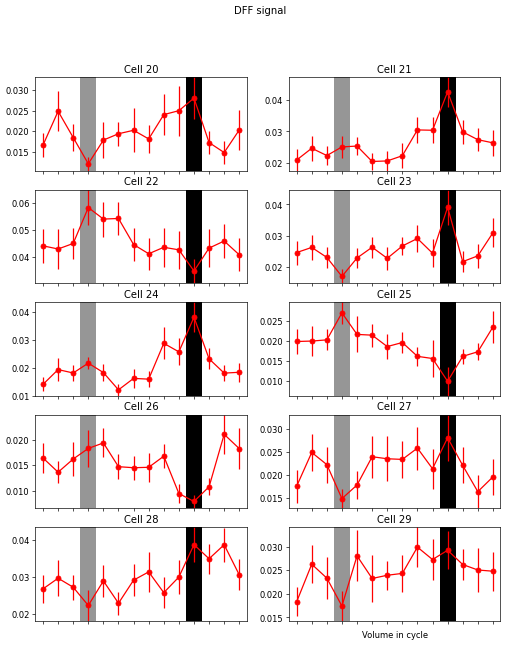

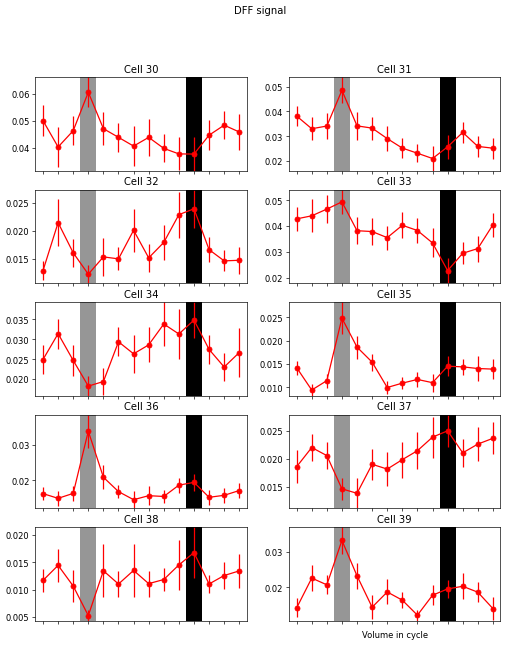

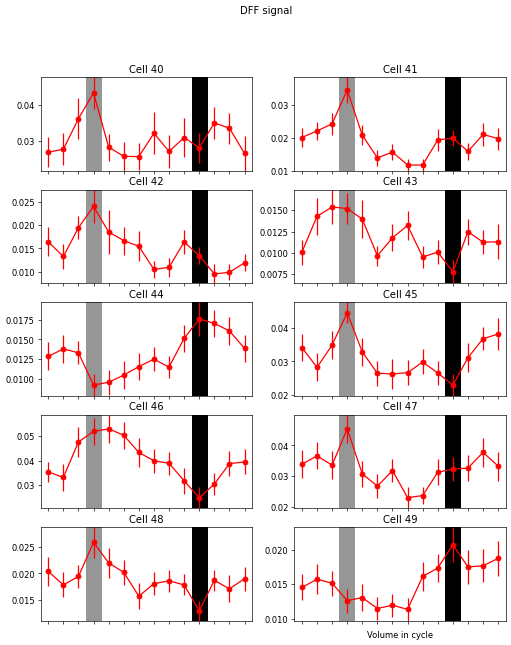

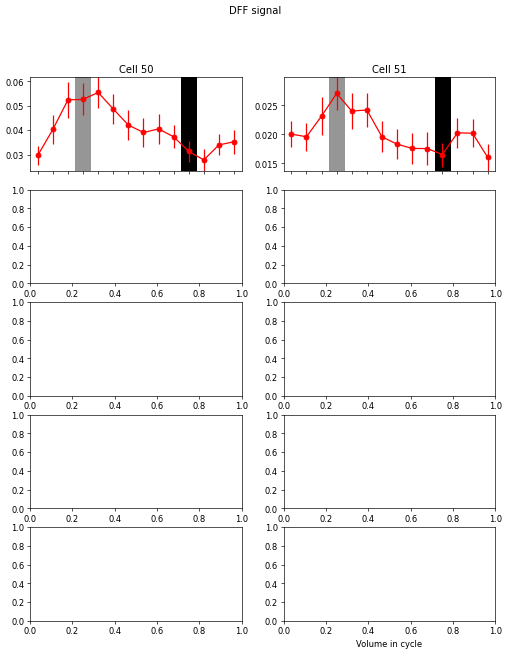

In [36]:
tpp = 10 # traces per page
cells = np.arange(sp.n_signals)
btchs = [cells[s: s+tpp] for s in np.arange(np.ceil(sp.n_signals / tpp).astype(int))*tpp]

main_title = "DFF signal"

# indifidual pdf pages will be saved to this folder, but will be deleted right after the merge 
tmp_folder = 'D:/Code/repos/numerosity_2/data/processed/img/20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1/spots/'
# filename to save pdf with all the significant traces
pdf_filename = f'D:/Code/repos/numerosity_2/data/processed/img/20211210_ce02_abtl_h2bcamp6s_8dpf_2v5_2P_1/spots/significant_signals_sem_mean_only_good_order.pdf'

pdfs = []
for ibtch, btch in enumerate(btchs):
    titles = [f"Cell {ipt}" for ipt in btch]
    sp.show_psh(btch, 
                main_title, 
                titles,
                # front_to_tail will shift the cycleby the set number of voxels
                # so when set to 3, there are 3 blank volumes at the begining and at the end ... 
                # if set to 0, will have 6 leading blanks and will end right after the 5 dots (black bar)
                front_to_tail = 3, 
                # what grid to use to show the points
                figure_layout = [5,2] ,
                # what error type to use ( "sem" for SEM or "prc" for 5th - 95th percentile )
                error_type = "sem",
                # figure parameters
                figsize = (10, 12),
                dpi = 60,
                # wheather to plot the individual traces 
                plot_individual = False,
                # the color of the individual traces (if shown)
                noise_color = '--c')

    plt.xlabel('Volume in cycle')
    filename = f'{tmp_folder}signals_batch{ibtch}.pdf'
    plt.savefig(filename)
    pdfs.append(filename)
    

merge_pdfs(pdfs, pdf_filename)